# 1.Rappel de la mission 

# 2.Importation des librairies

In [13]:
#-> import libraries
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta
import datetime as dt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
#-> Set directory
os.chdir('C:\\Users\\i.dialga\\Desktop\\Data science\\Openclassrooms\\Projet 6\\Data')

# Partie 1: Classification des articles à partir de leur description

# 1. Importation de la base de données & exploration

### 1.1. Contenu de la base

In [90]:
path = 'C:/Users/i.dialga/Desktop/Data science/Openclassrooms/Projet 6/Data/'
df=pd.read_csv(path + 'flipkart_com-ecommerce_sample_1050.csv')
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [31]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [50]:
df.tail()

uniq_id            crawl_timestamp  \
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1190.0             595.0  f2f027ad6a6df617c9f125173da71e44.jpg   

      is_FK_Advantage_product  \
1045                    False   
1046                    False   
1047                    False   
1048                    False   
1049                    False   

                                            description       product_rating  \
1045  Oren Empower Extra Large Self Adhesive Sticker...  No rating available   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...  No rating available   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  No rating available   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  No rating available   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...                    4   

           overall_rating         brand  \
1045  No rating available  Oren Empower   
1046  No rating available    Wallmantra   
1047  No rating available      Uberlyfe   
1048  No rating available    Wallmantra   
1049                    4      Uberlyfe   

                                 product_specifications  \
1045  {"product_specification"=>[{"key"=>"Number of ...   
1046  {"product_specification"=>[{"key"=>"Number of ...   
1047  {"product_specification"=>[{"key"=>"Number of ...   
1048  {"product_specification"=>[{"key"=>"Number of ...   
1049  {"product_specification"=>[{"key"=>"Sales Pack...   

                                           sentence_bow  \
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker pack pr...   
1047  buy uberlyfe extra large pigmented polyvinyl f...   
1048  buy wallmantra medium vinyl sticker sticker rs...   
1049  buy uberlyfe large vinyl sticker rs.595 online...   

                                       sentence_bow_lem  \
1045  oren empower extra large self adhesive sticker...   
1046  wallmantra large vinyl sticker sticker pack pr...   
1047  buy uberlyfe extra large pigmented polyvinyl f...   
1048  buy wallmantra medium vinyl sticker sticker rs...   
1049  buy uberlyfe large vinyl

In [51]:
df.sample(10)

uniq_id            crawl_timestamp  \
474   0f4f761de4224b004402c1f97e871ba4  2016-04-16 13:01:18 +0000   
79    320833ab08c9a94ef83520612899a85f  2016-05-22 16:29:40 +0000   
168   ea16e13a7cf16d8665d1bc44738dfa88  2015-12-01 12:40:44 +0000   
1041  b1644f47c7dfa58f8c06677f2a27ee09  2015-12-01 10:15:43 +0000   
810   a1fa0e24b2249ffa81f688c4840f1eb8  2015-12-12 11:46:53 +0000   
608   42a8fef62716772c391fbdd148cc9c16  2016-03-12 14:25:06 +0000   
928   3f9c4d0e8c3bca9c870e41f5098f90d6  2016-01-01 13:15:34 +0000   
266   0e73201f6d8807776e1d21c969078289  2015-12-01 12:40:44 +0000   
103   dfbd96036cbc28566e964cff04b5b3a8  2016-01-01 10:55:30 +0000   
271   9906d8f74589c452b00f2b5642a63c5f  2015-12-01 12:40:44 +0000   

                                            product_url  \
474   http://www.flipkart.com/art-n-beyond-150013/p/...   
79    http://www.flipkart.com/florence9-baby-cap-red...   
168   http://www.flipkart.com/printland-pmr1464-cera...   
1041  http://www.flipkart.com/wallmantra-extra-large...   
810   http://www.flipkart.com/oxyglow-fruit-massage-...   
608   http://www.flipkart.com/mohanjodero-jewellery-...   
928   http://www.flipkart.com/valtellina-checkered-d...   
266   http://www.flipkart.com/pigeon-kadhai-1-2-l/p/...   
103   http://www.flipkart.com/rama-floral-single-qui...   
271   http://www.flipkart.com/s-c-handicrafts-showpi...   

                                           product_name  \
474                                 Art n Beyond 150013   
79                    florence9 baby cap red checks Cap   
168                       Printland PMR1464 Ceramic Mug   
1041      Wallmantra Extra Large Vinyl Stickers Sticker   
810   Oxyglow Fruit Massage Cream With Vitamin-E & S...   
608   MohanJodero Jewellery Box Jewellery Vanity Jew...   
928           Valtellina Checkered Double Blanket Brown   
266                                 Pigeon Kadhai 1.2 L   
103     Rama Floral Single Quilts & Comforters Pink-Red   
271                 S C Handicrafts Showpiece  -  40 cm   

                                  product_category_tree               pid  \
474   ["Kitchen & Dining >> Bar & Glassware >> Bar G...  GLSEHEHRX2AEPMY4   
79    ["Baby Care >> Infant Wear >> Baby Boys' Cloth...  CAPEGW7UTGHRJBEW   
168   ["Kitchen & Dining >> Coffee Mugs >> Printland...  MUGEACY7ZZA9PFAY   
1041  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE9F5UFETEGPVY   
810   ["Beauty and Personal Care >> Combos and Kits ...  CBKEAHJX45HWRYB5   
608   ["Beauty and Personal Care >> Makeup >> Vanity...  VANEGKVF3W5GGC8D   
928   ["Home Furnishing >> Bed Linen >> Blankets, Qu...  BLAE39ZZYDGFHKUH   
266   ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPE9DQXGXYQXNBP   
103   ["Home Furnishing >> Bed Linen >> Blankets, Qu...  BLAEE6KTKJGZBXXZ   
271   ["Home Decor & Festive Needs >> Showpieces >> ...  SHIE2QTSMSXF9QAH   

      retail_price  discounted_price                                 image  \
474         1050.0             677.0  0f4f761de4224b004402c1f97e871ba4.jpg   
79           800.0             399.0  320833ab08c9a94ef83520612899a85f.jpg   
168          650.0             299.0  ea16e13a7cf16d8665d1bc44738dfa88.jpg   
1041        1839.0            1216.0  b1644f47c7dfa58f8c06677f2a27ee09.jpg   
810          545.0             453.0  a1fa0e24b2249ffa81f688c4840f1eb8.jpg   
608          695.0             295.0  42a8fef62716772c391fbdd148cc9c16.jpg   
928         2055.0             878.0  3f9c4d0e8c3bca9c870e41f5098f90d6.jpg   
266          945.0             899.0  0e73201f6d8807776e1d21c969078289.jpg   
103         1499.0             749.0  dfbd96036cbc28566e964cff04b5b3a8.jpg   
271         9500.0            8900.0  9906d8f74589c452b00f2b5642a63c5f.jpg   

      is_FK_Advantage_product  \
474                     False   
79                      False   
168                     False   
1041                    False   
810                     False   
608                     False   
928                     False   


In [10]:
df.shape

(1050, 15)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [39]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [40]:
display(df.shape,df.head())

(1050, 15)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [54]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
sentence_bow               1047
sentence_bow_lem           1047
sentence_dl                1050
dtype: int64

### 1.2. Valeurs manquantes et doublons

In [55]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
sentence_bow                 0
sentence_bow_lem             0
sentence_dl                  0
dtype: int64

In [56]:
df.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
sentence_bow               0.000000
sentence_bow_lem           0.000000
sentence_dl                0.000000
dtype: float64

In [58]:
df.isna().mean().sort_values()

uniq_id                    0.000000
sentence_bow               0.000000
overall_rating             0.000000
product_rating             0.000000
description                0.000000
is_FK_Advantage_product    0.000000
sentence_bow_lem           0.000000
image                      0.000000
pid                        0.000000
product_category_tree      0.000000
product_name               0.000000
product_url                0.000000
crawl_timestamp            0.000000
sentence_dl                0.000000
retail_price               0.000952
product_specifications     0.000952
discounted_price           0.000952
brand                      0.321905
dtype: float64

<AxesSubplot:>

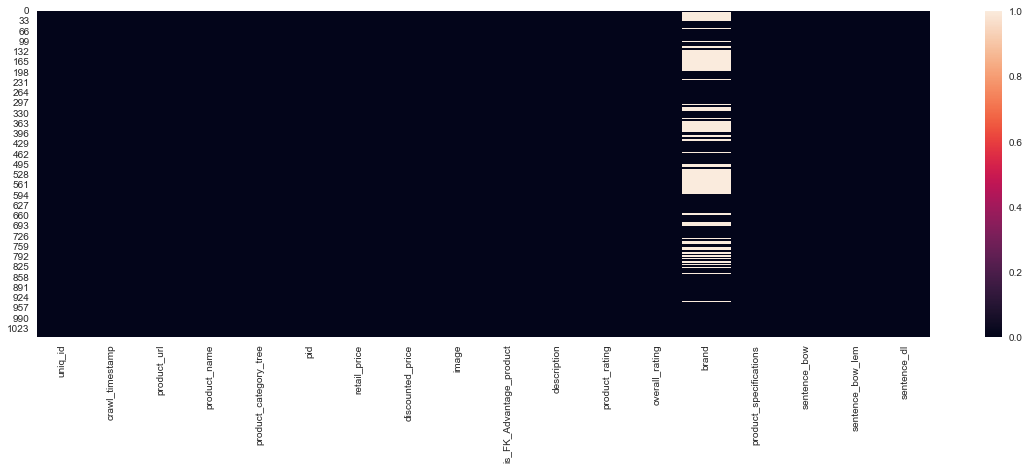

In [60]:
fig, ax=plt.subplots(1,1, figsize=(20,6))
sns.heatmap(df.isna())

In [61]:
df.duplicated().sum()

0

In [62]:
df.duplicated(subset="description").sum()

0

### 1.3.  Analyse exploratoire

In [4]:
df["description"].str.len()

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64

In [42]:
for cat in df["product_category_tree"]:
    print(cat)

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]
["Watches >> Wrist Watches >> Camerii Wrist Watches"]
["Watches >> Wrist Watches >> T STAR Wrist Watches"]
["Watches >> Wrist Watches >> Alfajr Wrist Watches"]
["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]
["Watches >> Wrist Watches >> Calibro Wrist Watches"]
["Watches >> Wrist 

# 2. Prétraitement sur la variable "description"

In [95]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
import unicodedata
import re

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## 2.1. Tokenization & nettoyage du corpus

In [ ]:
 # Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('_', ' ').replace('+', ' ').replace('/', ' ').replace('&', ' ')
    #sentence= unicodedata.normalize('NFKD', sentence).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # remove extra newlines
    #sentence_clean = re.sub(r'[\r|\n|\r\n]+', ' ',sentence)
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

### 2.1.1. Suppression des stop words et uniformisation de la typographie des mots

In [ ]:
#Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

## 2.1. Lemmatization

In [ ]:
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words if w.isalpha() and w not in string.punctuation]
    lem_w = " ".join(w for w in lem_w) 
    return lem_w

### 2.1.1. Préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)

In [ ]:
# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(w for w in lw)
    return transf_desc_text

### 1.1.2. Préparation du texte pour le bag of words avec lemmatization

In [ ]:
# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    #transf_desc_text = ' '.join(lem_w)
    #return transf_desc_text
    return  lem_w

### 2.1.3. Préparation du texte pour le Deep learning (USE et BERT)

In [ ]:
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(w for w in lw)
    return transf_desc_text

## 2. 2. Datasets nettoyés

In [ ]:
df1=df.copy()

df1['sentence_bow'] = df1['description'].apply(lambda x : transform_bow_fct(x))
df1['sentence_bow_lem'] = df1['description'].apply(lambda x : transform_bow_lem_fct(x))
df1['sentence_dl'] = df1['description'].apply(lambda x : transform_dl_fct(x))
df1.shape

## 2.3.  Visualisation des features obtenues

In [5]:
for w in df1['sentence_bow_lem']:
    print(w)

key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price this curtain enhances look curtain made high quality polyester feature eyelet style stitch metal make room environment romantic curtain ant wrinkle anti shrinkage elegant home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model color multicolor dimension length box number content sale package pack sale package curtain body design mat

In [68]:
for w in df1['sentence_dl']:
    print(w)

key features of elegance polyester multicolor abstract eyelet door curtain floral curtain , elegance polyester multicolor abstract eyelet door curtain ( 213 cm in height , pack of 2 ) price : rs . 899 this curtain enhances the look of the interiors.this curtain is made from 100 % high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs . the surreal attention is sure to steal hearts . these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening , you create the most special moments of joyous beauty given by the soothing prints . bring home the elegant curtain that softly filters light in your room s

### Application de tous les traitements

In [97]:
df1=df.copy()
df1["description"]=df1["description"].apply(tokenizer_fct)
df1["description"]=df1["description"].apply(stop_word_filter_fct)
df1["description"]=df1["description"].apply(lower_start_fct)
df1["description"]=df1["description"].apply(lemma_fct)

<AxesSubplot:>

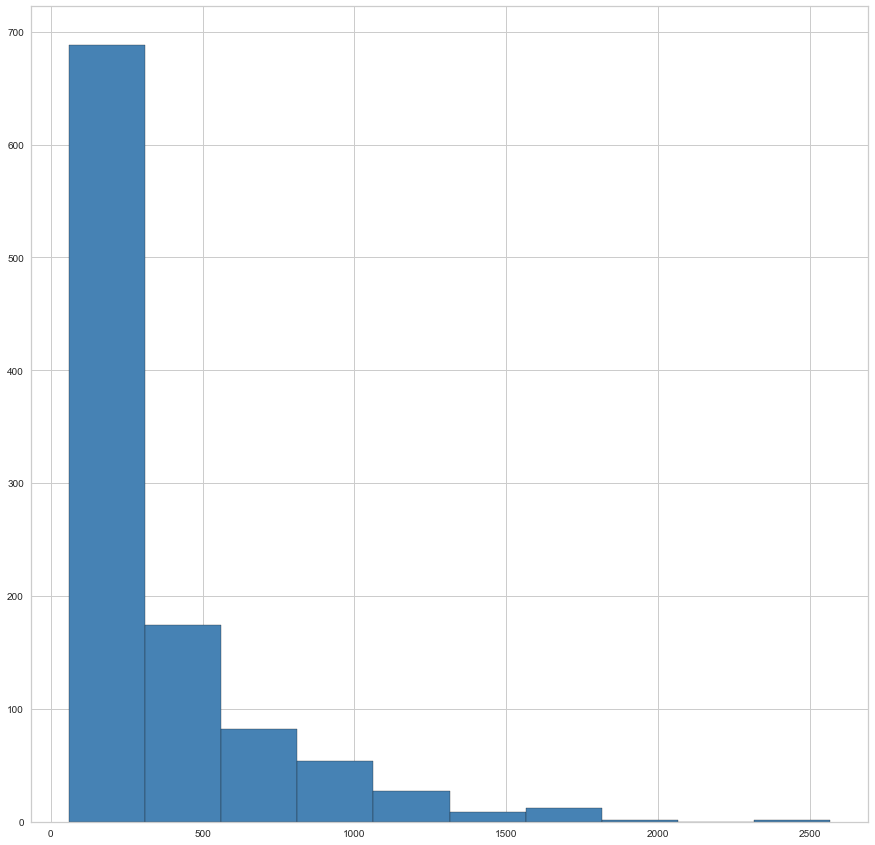

In [98]:
df1["len_description"]=df1.description.str.len()
df1["len_description"].hist(figsize=(15,15), alpha=1, color='#4682b4', ec="k")

In [59]:
for w in df1['description']:
    print(w)

key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price this curtain enhances look curtain made high quality polyester feature eyelet style stitch metal make room environment romantic curtain ant wrinkle anti shrinkage elegant home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model color multicolor dimension length box number content sale package pack sale package curtain body design mat

In [66]:
for w in df1['sentence_bow_lem']:
    print(w)

key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price this curtain enhances look curtain made high quality polyester feature eyelet style stitch metal make room environment romantic curtain ant wrinkle anti shrinkage elegant home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model color multicolor dimension length box number content sale package pack sale package curtain body design mat

## 2.4. Séparation des catégories en catégories principales & secondaires

In [69]:
# Definition of a function to apply or map
def get_categories_from_series(series):
    
    # --------------------------------------
    # Function to get the 3 first categories
    def get_categories_from_cell(cell):
        # Remove unwanted chars
        product_category_tree = cell.strip('[]"')

        # Get (at most) the 3 first categories of the category tree
        product_categories_list = product_category_tree.split(" >> ")
        # Initialization
        categories = pd.Series()
        
        # for each category, add a row
        for i in range(min(3, len(product_categories_list))):
            categories["cat_{}".format(i+1)] = product_categories_list[i]
        
        # return pd.Series with 3 rows
        return categories
    # Proceed to the split
    categories_df = series.apply(get_categories_from_cell).fillna("")

    # Return the frequency_encoding pd.DataFrame
    return categories_df
categories_df = get_categories_from_series(df1['product_category_tree'])


# Add the columns of categories to the data DataFrame
data_clean = pd.concat(
    [df1, categories_df],
    sort=False,
    axis=1
)

# Display results
data_clean.head(2)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   

   is_FK_Advantage_product  ...       product_rating       overall_rating  \
0                    False  ...  No rating available  No rating available   
1                    False  ...  No rating available  No rating available   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1  Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   

                                         sentence_dl            cat_1  \
0  key features of elegance polyester multicolor ...  Home Furnishing   
1  specifications of sathiyas cotton bath towel (...        Baby Care   

                    cat_2             cat_3  
0  Curtains & Accessories          Curtains  
1        Baby Bath & Skin  Baby Bath Towels  

[2 rows x 21 columns]

### Sauvegarde de la base nettoyée

In [70]:
data_clean.to_csv("data_clean.csv",index=False)

# 3.  Traitement de la base de donnée prétraitée

## 3.1.  Traitements spécifiques selon les modèles

In [19]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [13]:
import pandas as pd
data_clean =  pd.read_csv("data_clean.csv")
print(data_clean.shape)

(1050, 21)


In [12]:
data_clean['cat_1'].nunique()

7

In [113]:
list(data_clean.cat_1.unique())

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

In [21]:
l_cat = list(set(data_clean['cat_1']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_clean.iloc[i]['cat_1'])) for i in range(len(data_clean))]

catégories :  ['Home Furnishing', 'Kitchen & Dining', 'Baby Care', 'Computers', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Watches']


In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_clean['length_bow'] = data_clean['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_clean['length_bow'].max())
data_clean['length_dl'] = data_clean['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_clean['length_dl'].max())

max length bow :  380
max length dl :  631


## 3.2. Création de fonctions communes des modèles de classification

In [22]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

# 4.  Modélisation

## 4.1. Bag of word - Tf-idf

In [ ]:
Matrice de confusion: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.pair_confusion_matrix.html

### 4.1.1. Préparation sentences

In [23]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_clean[feat])
ctf_fit = ctf.fit(data_clean[feat])

cv_transform = cvect.transform(data_clean[feat])  
ctf_transform = ctf.transform(data_clean[feat])  

### 4.1.2. Exécution des modèles

In [24]:
print("CountVectorizer : ")
print("-----------------")
ARI_1, X_tsne_1, labels_1 = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
ARI :  0.4529 time :  15.0

Tf-idf : 
--------
ARI :  0.4763 time :  13.0


### 4.1.3. Visualisation graphique modèle CountVectorizer

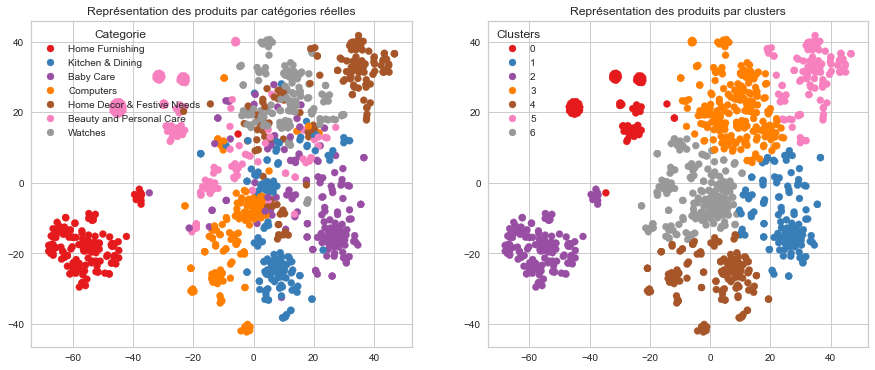

ARI :  0.4529


In [25]:
 TSNE_visu_fct(X_tsne_1, y_cat_num, labels_1, ARI_1)

### 4.1.4. Visualisation graphique modèle Tf-idf

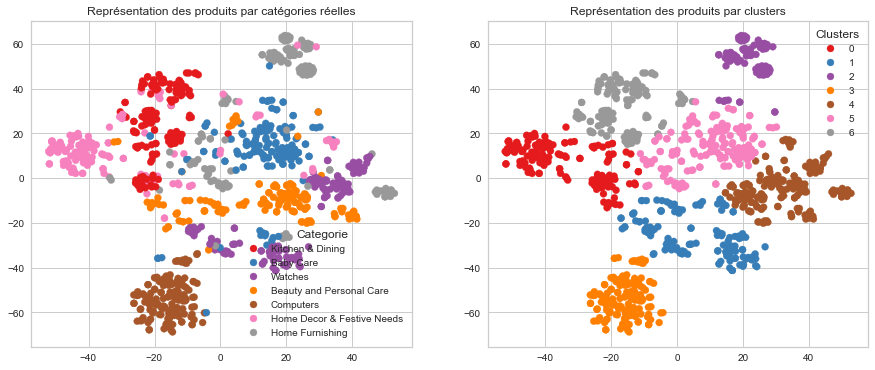

ARI :  0.4763


In [22]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 4.2. Word2Vec

In [7]:
#import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

### 4.2.1. Création du modèle Word2Vec

In [62]:
import gensim
w2v_size=200
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 600 # adapt to length of sentences
sentences = data_clean['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

### 4.2.2. Entrainement du modèle

In [63]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4421
Word2Vec trained


In [64]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4422


### 4.2.3. Création de la matrice d'embedding

In [65]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 200
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4422, 200)


In [66]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 600)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 600, 200)          884400    
                                                                 
 global_average_pooling1d_6   (None, 200)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 884,400
Trainable params: 884,400
Non-trainable params: 0
_________________________________________________________________


### 4.2.4. Exécution du modèle

In [67]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 10ms/step


(1050, 200)

In [68]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3987 time :  35.0


### 4.2.5.  Représentation graphique

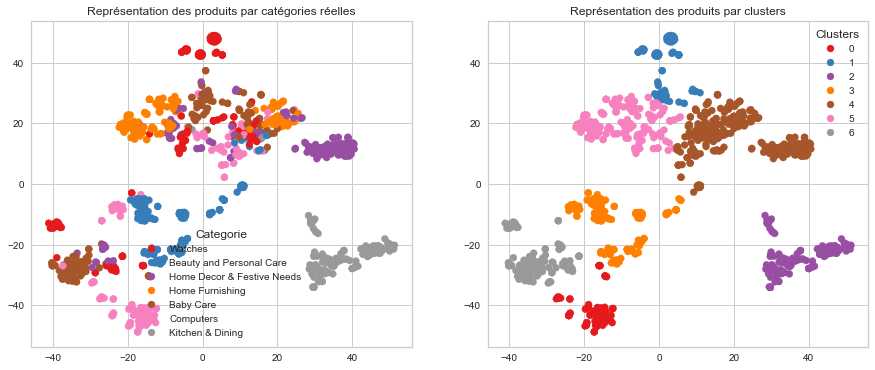

ARI :  0.3987


In [69]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 4.3. BERT

In [8]:
#import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

### 4.3.1. Fonctions communes

In [28]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### 4.3.2.  BERT HuggingFace

### 'bert-base-uncased'

In [29]:
max_length = 361
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_clean['sentence_dl'].to_list()

In [36]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 6s 6s/step
temps traitement :  749.0


### 4.3.2.1. Métrics

In [37]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.2917 time :  14.0


### 4.3.2.2 Graphiques

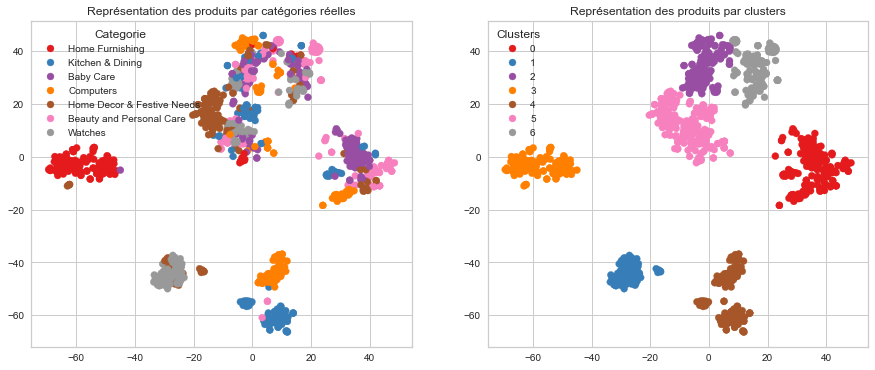

ARI :  0.2917


In [38]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### 4.3.3.  BERT hub Tensorflow

In [39]:
import tensorflow_hub as hub
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [40]:
sentences = data_clean['sentence_dl'].to_list()

In [41]:
max_length = 361
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  728.0


### 4.3.3.1. Métriques

In [46]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.2872 time :  15.0


### 4.3.3.2. Représentation graphiques catégories réelles versus clusters

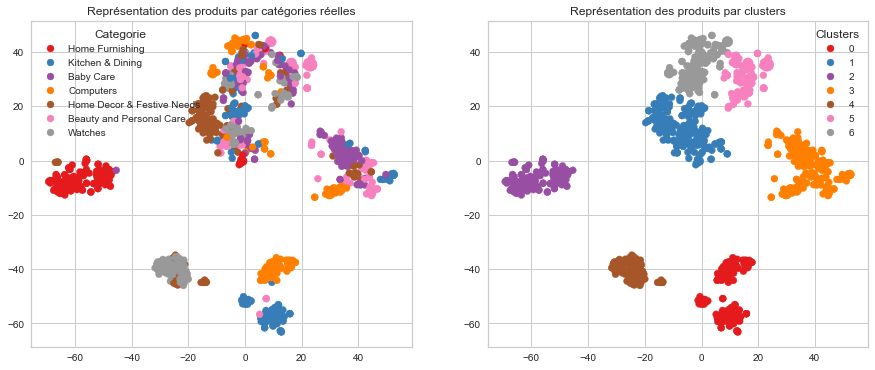

ARI :  0.2872


In [47]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## 4.4. USE - Universal Sentence Encoder

### 4.4.1. Librairairies et fonction

In [9]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [83]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [84]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [85]:
batch_size = 10
sentences = data_clean['sentence_dl'].to_list()

In [86]:
features_USE = feature_USE_fct(sentences, batch_size)

### 4.4. 2.  Métriques

In [87]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4042 time :  36.0


### 4.4. 3. Graphiques

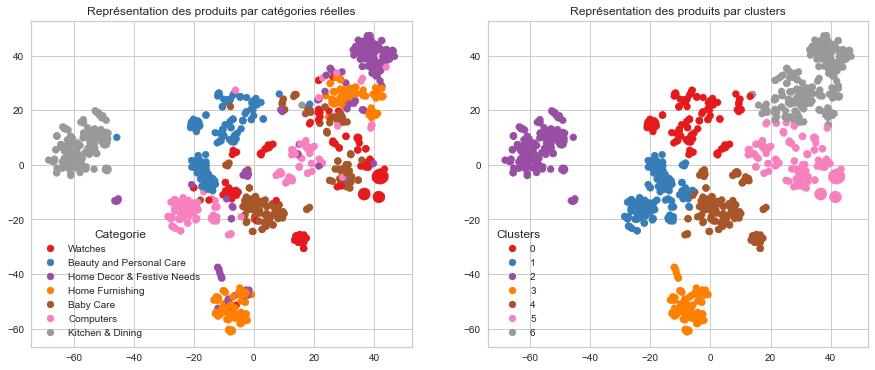

ARI :  0.4042


In [88]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Partie 2: Classification des articles à partir de leur image

## 1. Importations des données 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

path = 'C:/Users/i.dialga/Desktop/Data science/Openclassrooms/Projet 6/Data/Images/'
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


### Importation des images

In [2]:
data_clean =  pd.read_csv("data_clean.csv")
print(data_clean.shape)

(1050, 21)


In [3]:
data_clean['img_np']=data_clean["image"].apply(lambda x: plt.imread("Images/"+x))

In [35]:
data_clean["img_np"][10].shape

(1343, 1948, 3)

In [17]:
list_photos = [file for file in data_clean["image"]]
print(len(list_photos))

1050


In [100]:
print(list_photos)

['009099b1f6e1e8f893ec29a7023153c4.jpg', '0096e89cc25a8b96fb9808716406fe94.jpg', '00cbbc837d340fa163d11e169fbdb952.jpg', '00d84a518e0550612fcfcba3b02b6255.jpg', '00e966a5049a262cfc72e6bbf68b80e7.jpg', '00ed03657cedbe4663eff2d7fa702a33.jpg', '01089dc3618a0ab7304d784ef400b83d.jpg', '0131e5d87b72877702d536299cf83b75.jpg', '020d2daba55a723128e4e07c0b0393a9.jpg', '02127f52e96fb72c66bf081d25104ef8.jpg', '025a85a3d1cddc6307f7dc075d8d2132.jpg', '02a53d335775b652f22f41b529b9d646.jpg', '02c63a087b298ec74042d557acf61be1.jpg', '031c98cfde349d99fb6d5983f54c8751.jpg', '032e812adcd11a38fd8b764891a852ff.jpg', '037b39bef3db7ccd264c577a0edf0c0a.jpg', '037c2402fee39fbc80433935711d1383.jpg', '04f9f818e2d657b873b07578cfe2eade.jpg', '04f9ff160a1561e3656350f4bd6b8c50.jpg', '050ea3acb555bf641e7ae9b4f3ba684a.jpg', '052559ede419996737893eb47568ee7f.jpg', '057836ecde71565f8ebdd576e41fdc96.jpg', '059493eeb88ebb4cc08d1522f3f87c3f.jpg', '059bc43e03e1824a9ab6466e32e5f137.jpg', '06749cbff1487f470438823f6952cfd1.jpg',

### Encodage des labels 

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_clean["label"]= le.fit_transform(data_clean.cat_1)
data_clean

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [37]:
data_clean[['label','image']].groupby("label").count()

image
label       
0        150
1        150
2        150
3        150
4        150
5        150
6        150

### Association des images à la dataset

In [4]:
path = 'C:/Users/i.dialga/Desktop/Data science/Openclassrooms/Projet 6/Data/Images/'
list_photos = [file for file in listdir(path)]
list_photos
photo_name=data_clean['image'].tolist()
photo =[]
no_photo ='no_photo'
for i in photo_name:
    if i in list_photos:
        photo.append(path+i)
    else :
        photo.append (no_photo)
data_clean['photo']=photo

NameError: name 'listdir' is not defined

### Affichage d'exemples d'images par catégorie

In [152]:
data_unique=data_clean.groupby("cat_1").first()

In [125]:
list(data_clean["cat_1"].unique())

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

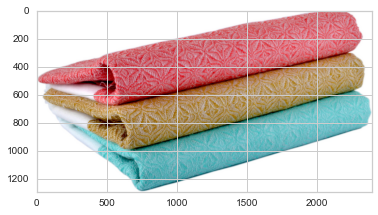

Baby Care


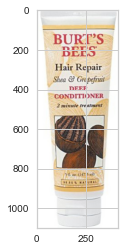

Beauty and Personal Care


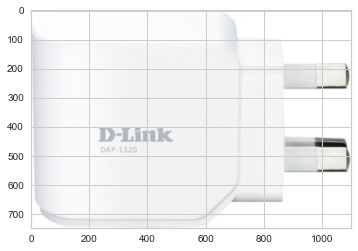

Computers


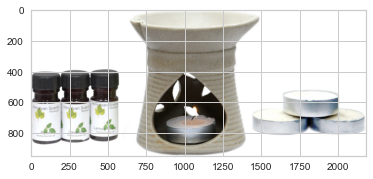

Home Decor & Festive Needs


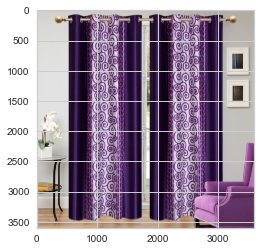

Home Furnishing


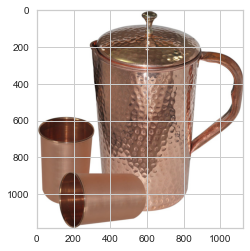

Kitchen & Dining


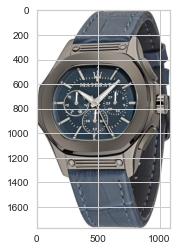

Watches


In [156]:
from matplotlib.image import imread
for i in range(7):
    #plt.subplot(2, 2, i+1)
    image = imread(data_unique['photo'][i])
    plt.imshow(image)
    plt.show()
    print(data_unique.index[i])

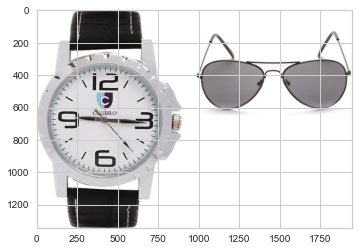

In [66]:
 image = imread(data_clean['photo'][10])
plt.imshow(image)

# 2. Classification avec la méthode SIFT

## 2.1. Détermination et affichage des descripteurs SIFT

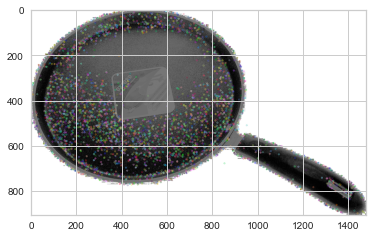

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [24]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## 2. 2. Créations des descripteurs de chaque image

In [25]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           523.92 secondes


In [159]:
sift_keypoints_by_img[10].shape

(501, 128)

## 2.3. Création des clusters de descripteurs

In [137]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             9.67 secondes


## 2.4. Création des features des images

In [138]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            49.53 secondes


In [162]:
im_features[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.008, 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.002, 0.   , 0.   , 0.004, 0.   , 0.   , 0.   ,
       0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.002, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.004, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.006, 0.   ,
       0.004, 0.   , 0.   , 0.002, 0.002, 0.002, 0.002, 0.006, 0.002,
       0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.002, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.002, 0.002, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
       0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.002, 0.   ,

## 2.5. Réduction de dimension PCA

In [139]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.9)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 178)


## 2. 6.Réduction de dimension T-SNE

In [140]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_clean["cat_1"]
print(df_tsne.shape)

(1050, 3)


In [146]:
df_tsne.head()

tsne1      tsne2            class
0  14.417375   7.613249  Home Furnishing
1   1.216390 -30.596020        Baby Care
2  30.829222  18.385908        Baby Care
3   3.282676 -18.439224  Home Furnishing
4  20.992966  22.990074  Home Furnishing

## 2.7. Analyse visuelle : affichage T-SNE selon catégories d'images

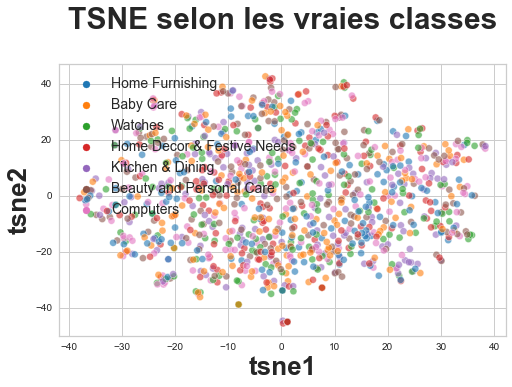

In [147]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()

## 2.8. Analyse mesures : similarité entre catégories et clusters

### 2.8.1. Création de clusters à partir du T-SNE

In [148]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [149]:
df_tsne.head()

tsne1      tsne2            class  cluster
0  14.417375   7.613249  Home Furnishing        3
1   1.216390 -30.596020        Baby Care        4
2  30.829222  18.385908        Baby Care        3
3   3.282676 -18.439224  Home Furnishing        4
4  20.992966  22.990074  Home Furnishing        3

### 2.8.2. Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

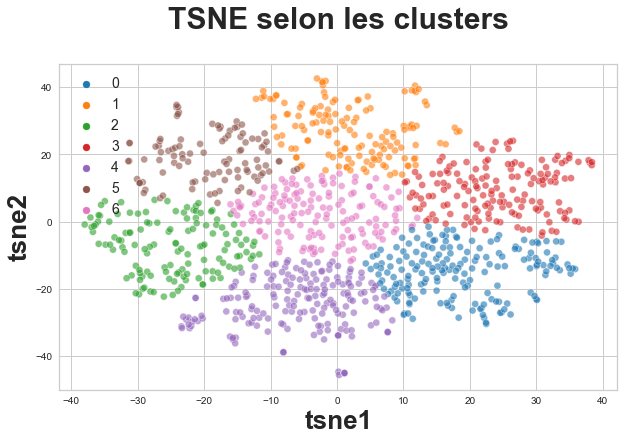

ARI :  0.0021966884170015006


In [150]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_clean["cat_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### 2.8.3. Analyse par classes

In [118]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    181
1    141
2    132
3    155
4    189
5    101
6    151
Name: class, dtype: int64

# 3. Classification par le CNN Transfer Learning

## 3. 1. Librairies et chargement des données

In [1]:
import glob
import cv2
from IPython.display import Image
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
# On charge les données images
path = 'C:/Users/i.dialga/Desktop/Data science/Openclassrooms/Projet 6/Data/Images/'
images = [cv2.imread(file) for file in glob.glob("Images/*.jpg")]
#warnings.filterwarnings('ignore')

In [2]:
#images_list =[Image(file) for file in data_clean['photo']]
images_list =[Image(file) for file in glob.glob("Images/*.jpg")]

In [3]:
print(len(images_list))

1050


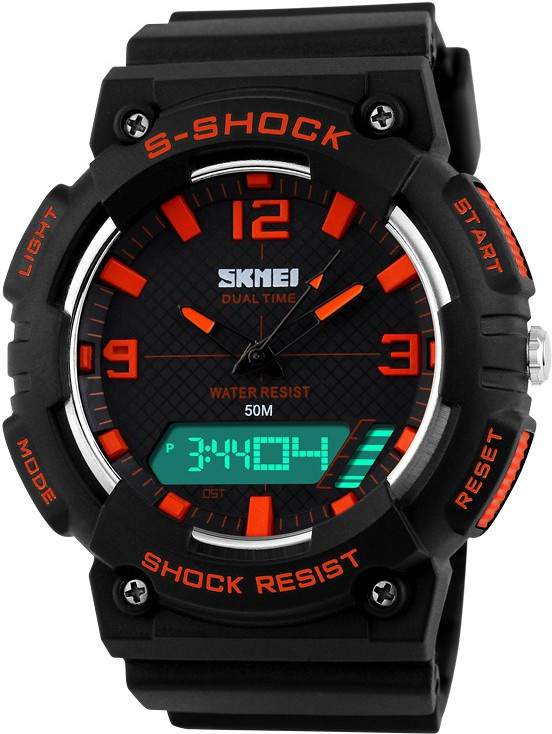

In [49]:
Image('Images/'+ str(data_clean.sample(1)['image'].values.tolist()[0]), width=100 )

In [56]:
img_echantillon = data_clean.sample(100, random_state=10)

In [57]:
img_echantillon 

uniq_id            crawl_timestamp  \
775  93618b8a998782d4d847ee5cba5c7de2  2015-12-12 11:46:53 +0000   
806  9c06a95a82c3bd6635b9fe6e92b15902  2015-12-12 11:46:53 +0000   
694  0ae859a69c7608d8197c3ba8c37bc6ec  2015-12-31 09:19:31 +0000   
370  b42a9b597a3a3dc8f428e2e2323e9aff  2015-12-01 06:13:00 +0000   
547  987e13b445c34bfedb9796d2bb78d593  2016-01-07 05:50:25 +0000   
..                                ...                        ...   
31   29b1ca231e10d5269516b80bf9d0dffc  2015-12-04 07:25:36 +0000   
203  5b378b0925d5409b5d84ceb416fc2afc  2015-12-01 12:40:44 +0000   
625  0a3b5fdf77a361c2d7d9b29c259b8c4e  2016-04-18 03:49:23 +0000   
318  fd2716d0e5dd7ffc367ca4dd9f97aaa0  2015-12-01 06:13:00 +0000   
910  23b0bdd337f7d1b4b70ad13726a122ab  2016-04-02 19:26:28 +0000   

                                           product_url  \
775  http://www.flipkart.com/carter-s-self-design-s...   
806  http://www.flipkart.com/mxofere-combo-papaya-m...   
694  http://www.flipkart.com/tallenge-christmas-col...   
370  http://www.flipkart.com/anna-andre-paris-flora...   
547  http://www.flipkart.com/maxima-01727lpln-mac-g...   
..                                                 ...   
31   http://www.flipkart.com/lenco-bdblue-tango-ana...   
203  http://www.flipkart.com/purpledip-showpiece-12...   
625  http://www.flipkart.com/shopoj-blue-paper-sky-...   
318  http://www.flipkart.com/asus-wireless-ac2400-d...   
910  http://www.flipkart.com/beebay-baby-boy-s-chec...   

                                          product_name  \
775     Carter'S Self Design Single Blanket Multicolor   
806  Mxofere Combo Papaya Mixfruit Almond Honey Ora...   
694  Tallenge Christmas Collection - Echoes Of Wint...   
370  Anna Andre Paris Floralina & Red Horizon Combo...   
547  Maxima 01727LPLN Mac Gold Analog Watch  - For ...   
..                                                 ...   
31    Lenco Bdblue Tango Analog Watch  - For Men, Boys   
203                      Purpledip Showpiece  -  12 cm   
625                      SHOPOJ Blue Paper Sky Lantern   
318      Asus Wireless AC2400 Dual-band Gigabit Router   
910           Beebay Baby Boy's Checkered Casual Shirt   

                                 product_category_tree               pid  \
775  ["Baby Care >> Baby Bedding >> Baby Blankets >...  BLAE7ZARKHFBHYE8   
806  ["Beauty and Personal Care >> Combos and Kits ...  CBKEBVA8H7KPU6HK   
694  ["Home Decor & Festive Needs >> Wall Decor & C...  PTGEDZBHZHGW2H4H   
370  ["Beauty and Personal Care >> Fragrances >> De...  CAGDTN27DEWJYUHK   
547  ["Watches >> Wrist Watches >> Maxima Wrist Wat...  WATDZ5HGF7WGCFGH   
..                                                 ...               ...   
31   ["Watches >> Wrist Watches >> Lenco Wrist Watc...  WATEB2FZUMQU4W7R   
203  ["Home Decor & Festive Needs >> Showpieces >> ...  SHIDYZAYRM4KKJGR   
625  ["Home Decor & Festive Needs >> Decorative Lig...  LTNEHQSPYYBAEWYY   
318  ["Computers >> Network Components >> Routers >...  RTREYTY2TMVNXZG4   
910  ["Baby Care >> Infant Wear >> Baby Boys' Cloth...  SHTEFGG5HZYKCFTT   

     retail_price  discounted_price                                 image  \
775        1599.0             980.0  93618b8a998782d4d847ee5cba5c7de2.jpg   
806         285.0             285.0  9c06a95a82c3bd6635b9fe6e92b15902.jpg   
694        2499.0            1799.0  0ae859a69c7608d8197c3ba8c37bc6ec.jpg   
370         355.0             249.0  b42a9b597a3a3dc8f428e2e2323e9aff.jpg   
547         650.0             650.0  987e13b445c34bfedb9796d2bb78d593.jpg   
..            ...               ...                                   ...   
31         1499.0             599.0  29b1ca231e10d5269516b80bf9d0dffc.jpg   
203        1250.0             638.0  5b378b0925d5409b5d84ceb416fc2afc.jpg   
625        2099.0            1458.0  0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg   
318       29990.0           21290.0  fd2716d0e5dd7ffc367ca4dd9f97aaa0.jpg   
910         845.0             845.0  23b0bdd337f7d1b4b70ad1

In [50]:
print(len(img_echantillon))

100


In [58]:
img_echantillon['image'] = img_echantillon['image'].apply(lambda x: 'Images/'+str(x))

In [76]:
img_echantillon['image'].head(1)

775    Images/93618b8a998782d4d847ee5cba5c7de2.jpg
Name: image, dtype: object

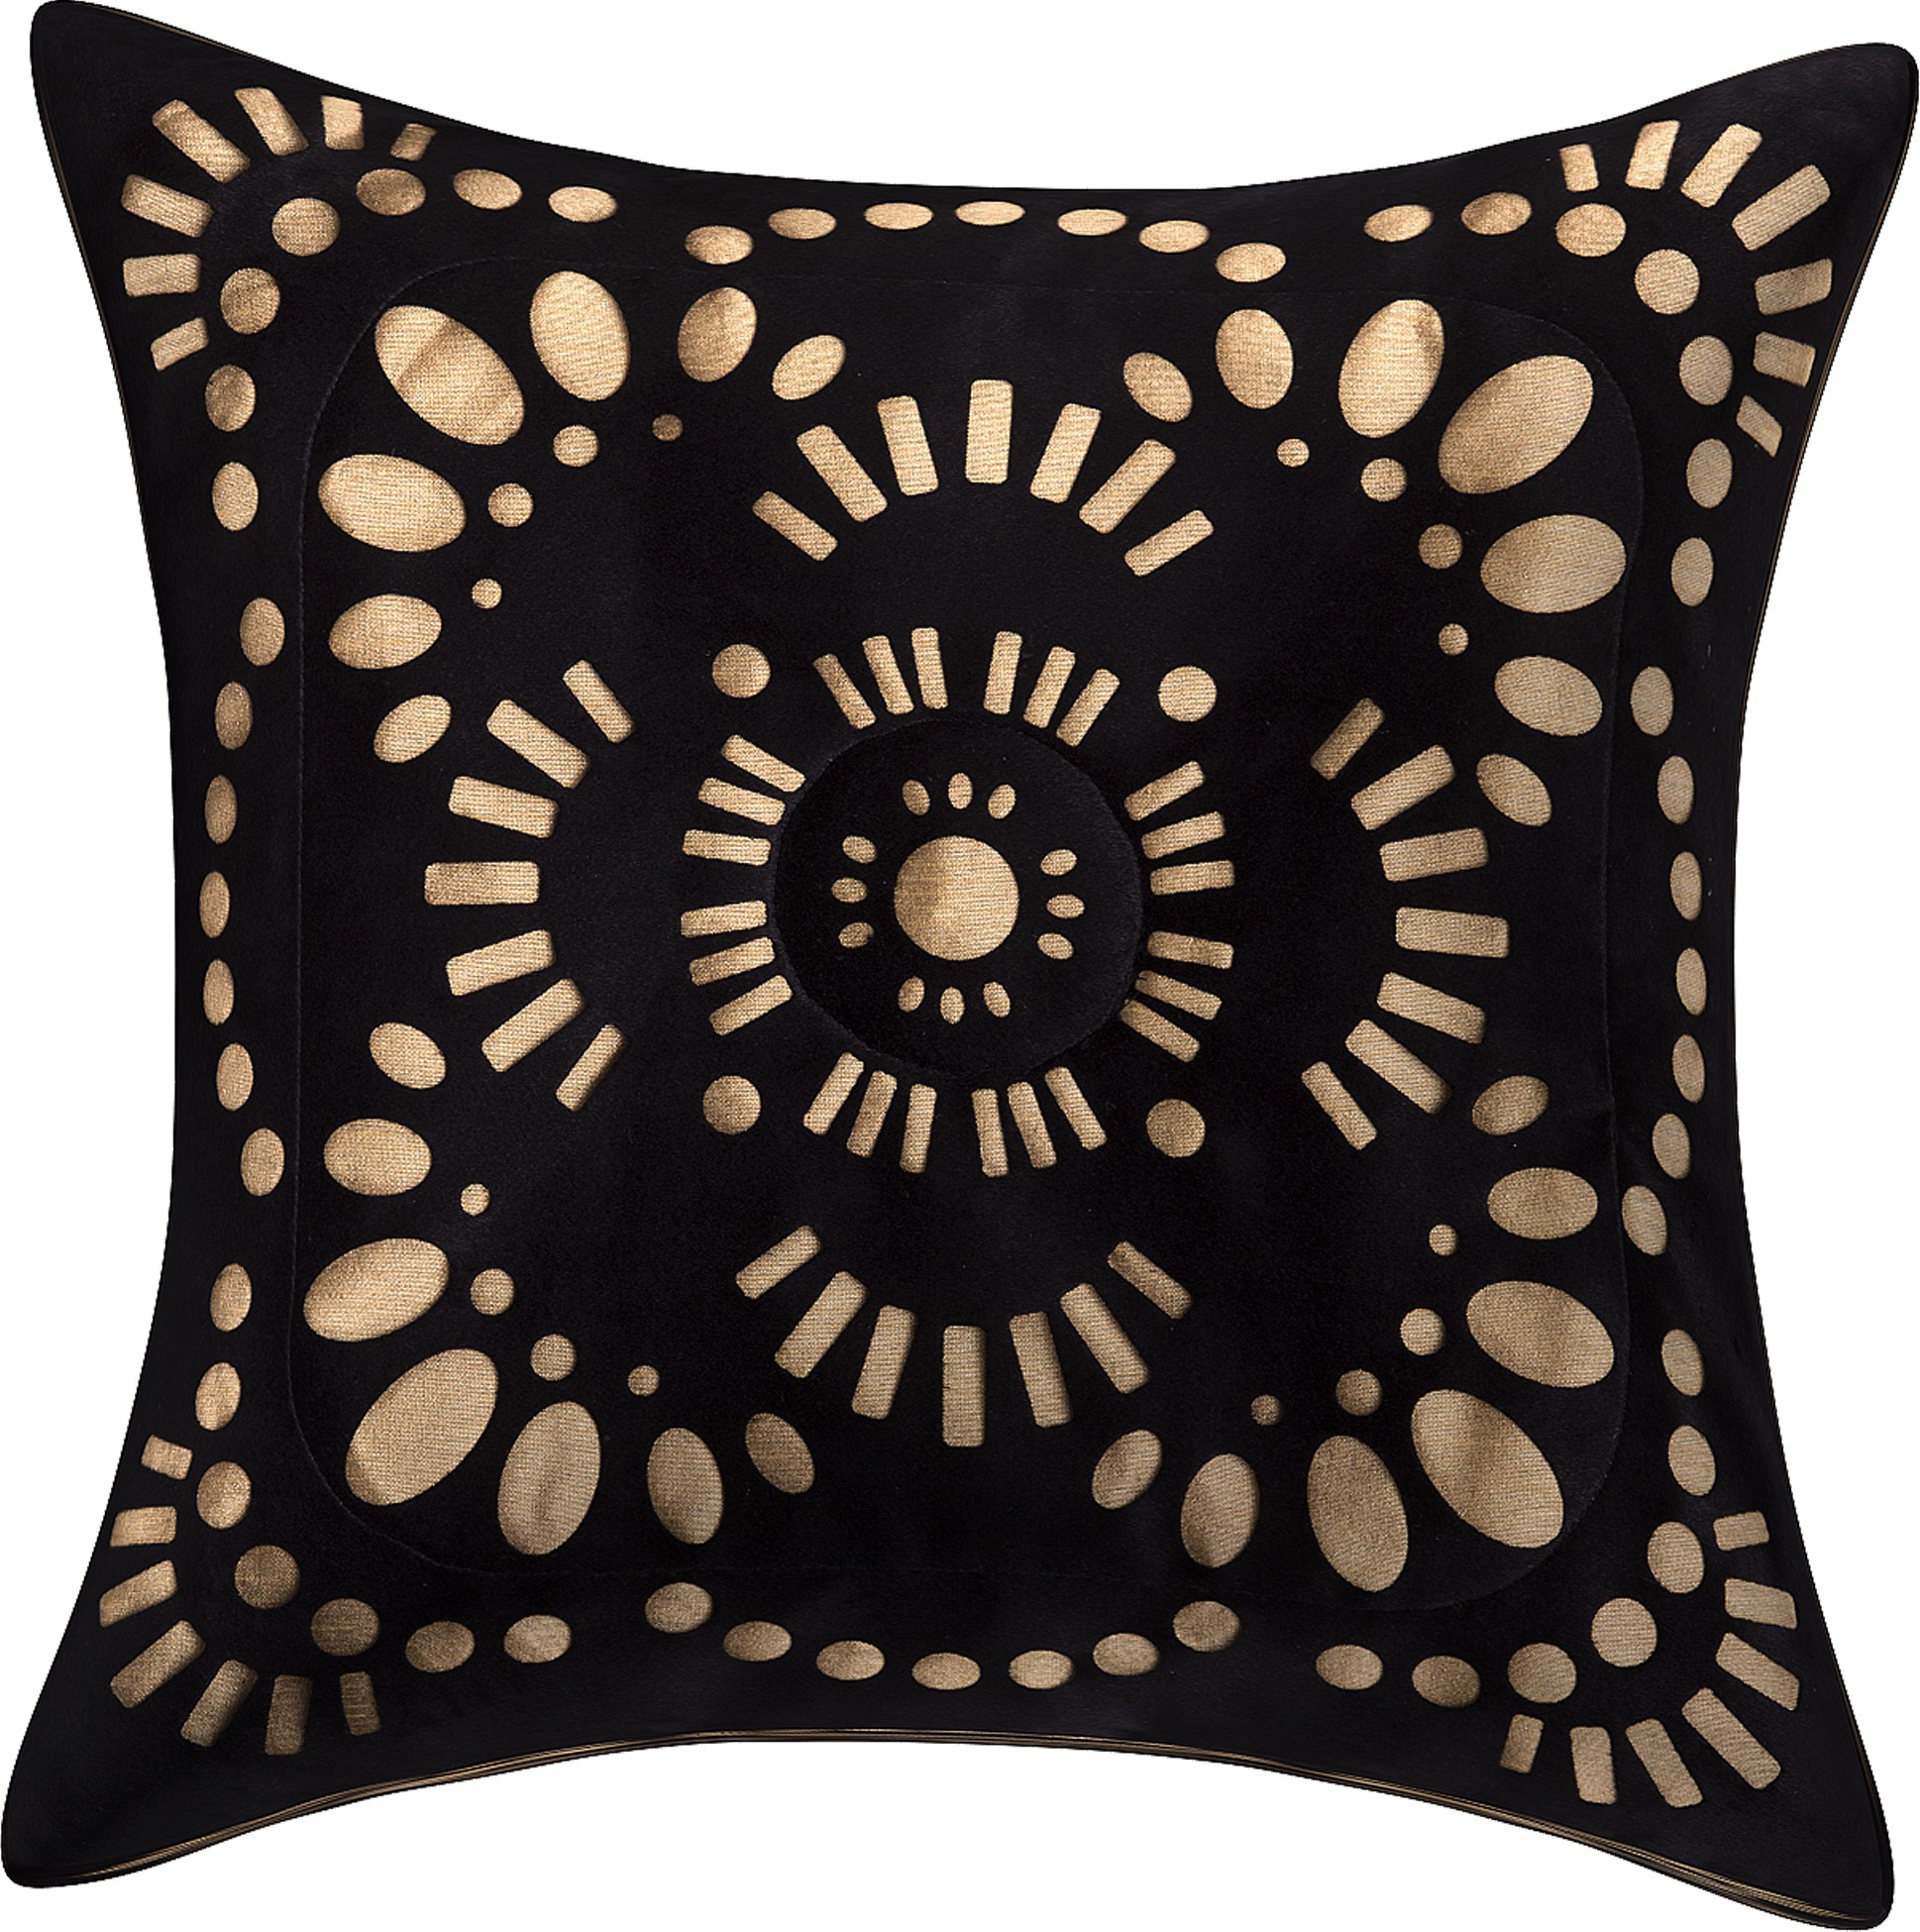

In [77]:
Image(img_echantillon.iloc[10]['image'], width=150)

In [78]:
img_echantillon.iloc[10]

uniq_id                                     2eb07dc77e2fc7e3668fd7ed9b864039
crawl_timestamp                                    2015-12-20 08:26:17 +0000
product_url                http://www.flipkart.com/rustic-india-geometric...
product_name                           Rustic India Geometric Cushions Cover
product_category_tree      ["Home Furnishing >> Cushions, Pillows & Cover...
pid                                                         CPCEBYA6UYMFQRJY
retail_price                                                          1399.0
discounted_price                                                       799.0
image                            Images/2eb07dc77e2fc7e3668fd7ed9b864039.jpg
is_FK_Advantage_product                                                False
description                Rustic India Geometric Cushions Cover (Pack of...
product_rating                                           No rating available
overall_rating                                           No rating available

## 3.2. Filtrage d'image : essai de convolution


In [ ]:
# Il existe différentes techniques de filtrage selon le type de bruit à atténuer. 
# Le lissage par moyennage utilise un filtre linéaire et fait partie, en ce sens, de la classe de filtrage la plus simple.
# l'application d'un filtre linéaire est également connue sous le terme de filtrage par convolution
# Les deux types de filtres linéaires les plus populaires sont les filtres moyenneurs et les filtres gaussiens

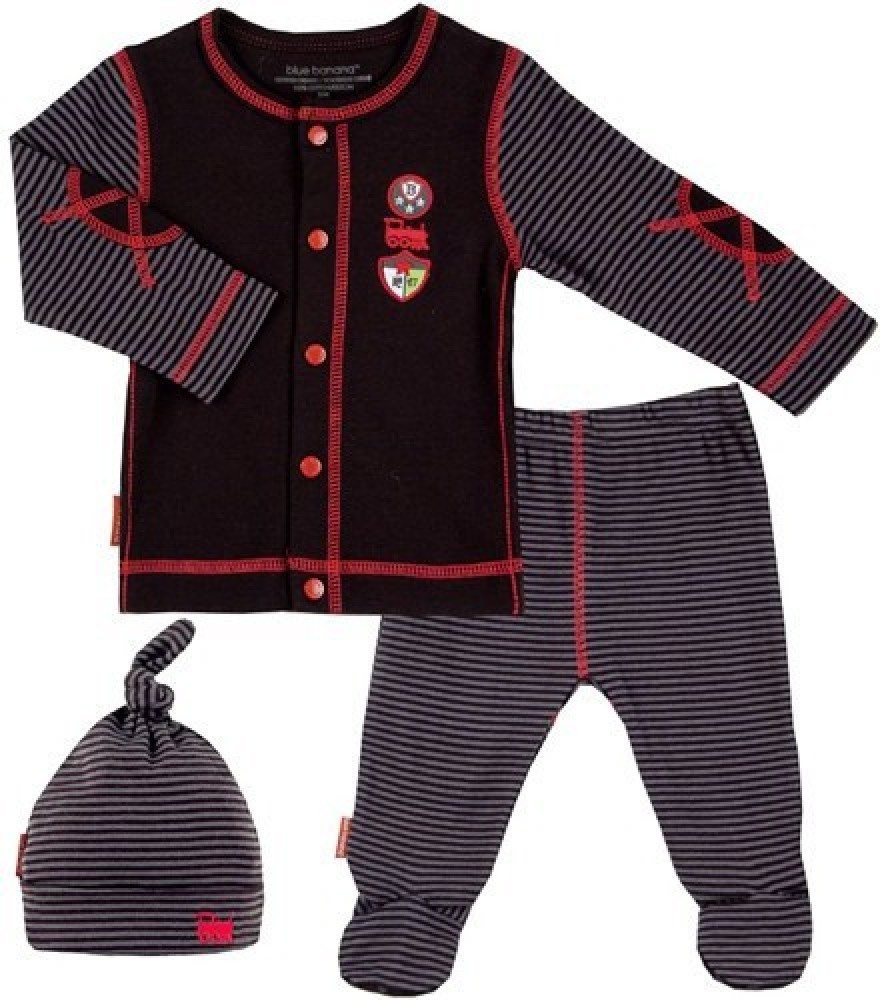

In [79]:
display(Image('Images/9d3ca83f7017d6e9e129964e88503ff0.jpg', width=200))

In [80]:
img_conv = Image_PIL.open('Images//93618b8a998782d4d847ee5cba5c7de2.jpg')

In [81]:
img_conv = np.array(img_conv)

In [69]:
img_conv = cv2.resize(img_conv, (200,200))

In [82]:
def filtre_moyenneur(img, voisinage = 1):
    '''Remplace chaque pixel par l\'intensité moyenne de son voisinage'''
    etendue = 1+2*voisinage
    img2 = np.copy(img)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if (i<voisinage)|(i>img.shape[0] - voisinage-1):
                img2[i,j] = int(255/2)
            if (j<voisinage)|(j>img.shape[0] - voisinage-1):
                img2[i,j] = int(255/2)
            
            
    for i in range(voisinage,img.shape[0]-voisinage):
        for j in range(voisinage,img.shape[1]-voisinage):
            mean = 0
            for mean_x in range(i-voisinage, i+voisinage+1):
                for mean_y in range(j-voisinage, j+voisinage+1):
                    mean += img[mean_x, mean_y]
            img2[i,j] = mean/(etendue**2)
    
    
    return img2  

In [83]:
img_conv_traitee_1 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=1)
img_conv_traitee_2 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=2)
img_conv_traitee_3 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=3)
img_conv_traitee_4 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=4)

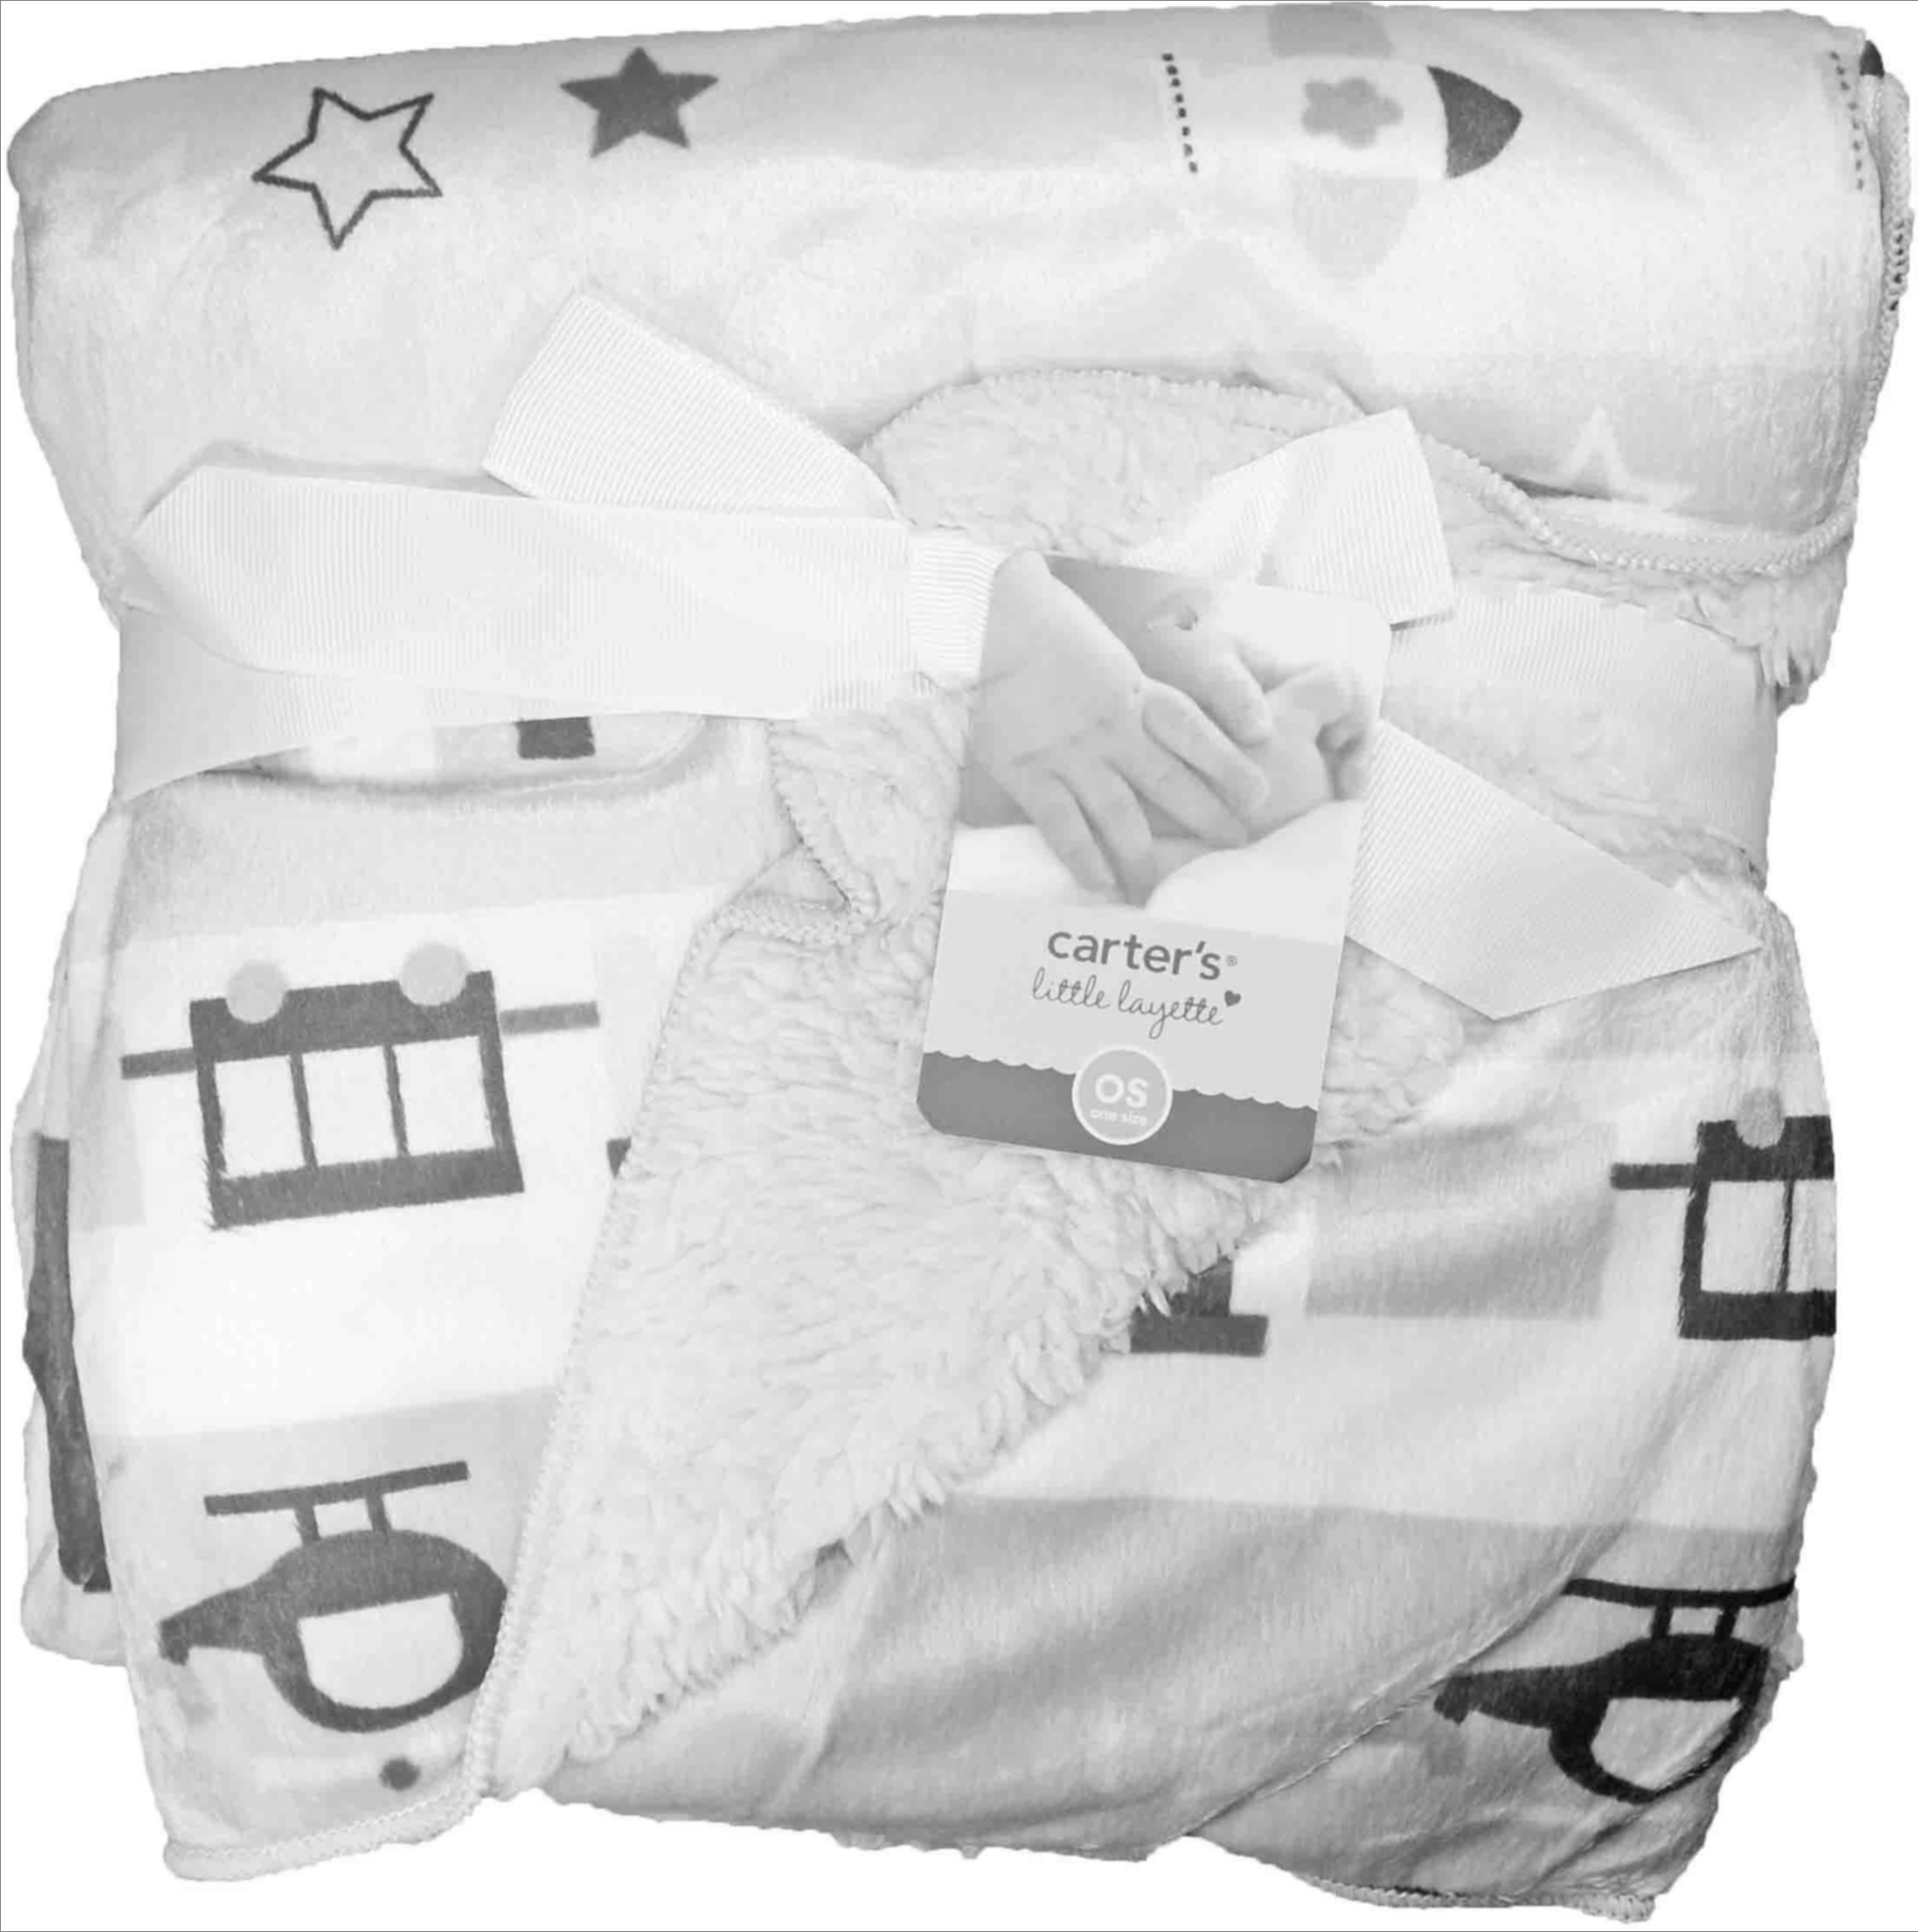

In [84]:
Image_PIL.fromarray(img_conv_traitee_1)

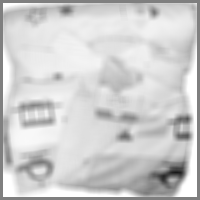

In [73]:
Image_PIL.fromarray(img_conv_traitee_3)

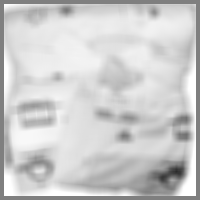

In [74]:
Image_PIL.fromarray(img_conv_traitee_4)

## 3.3. Prétraitement

### 3.3.1. Réduction de bruit

In [85]:
im = np.array(Image_PIL.open(img_echantillon.iloc[12]['image']))

In [86]:
im = gaussian_filter(im, sigma=3)

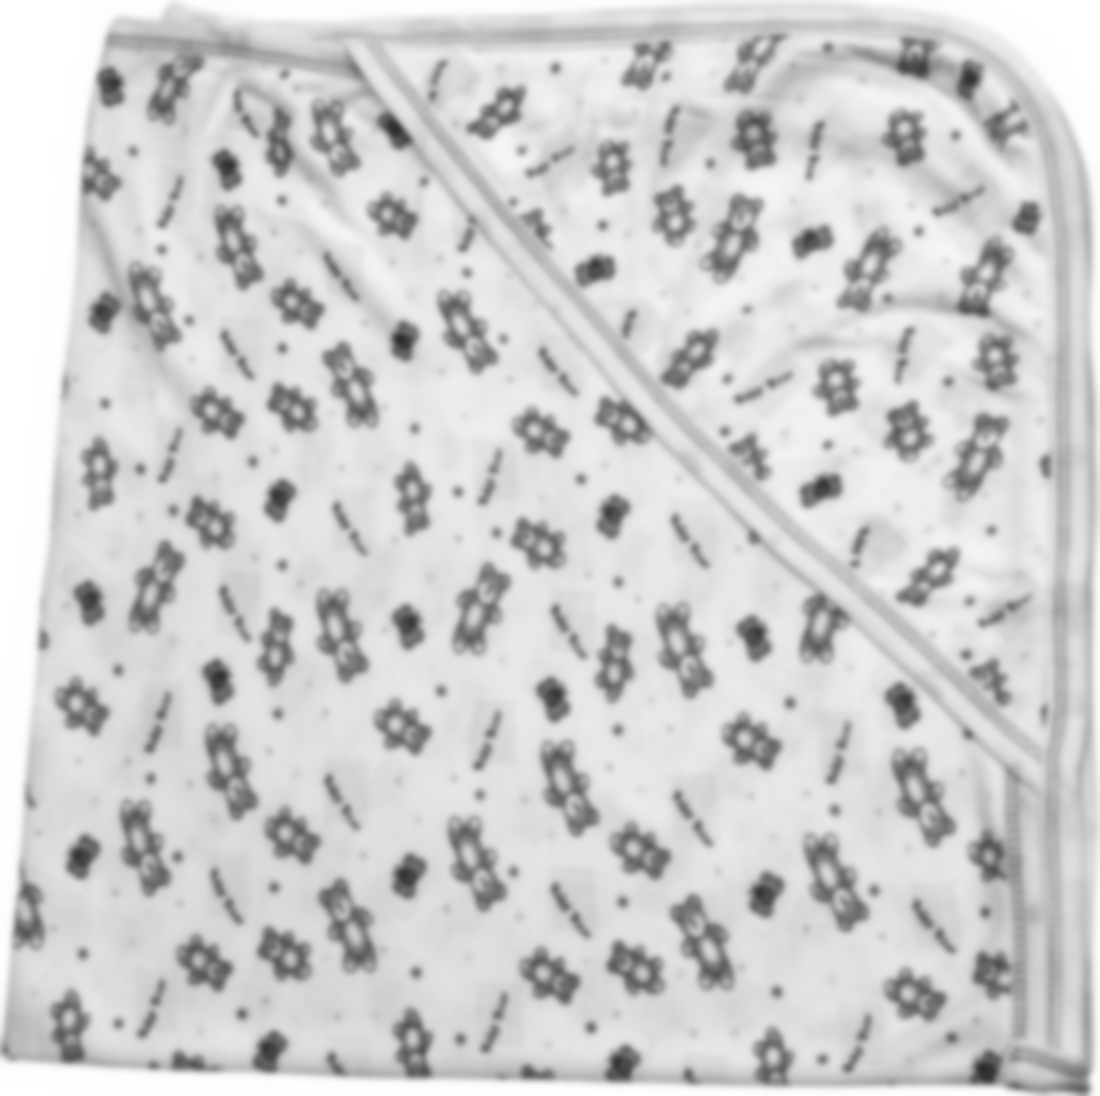

In [87]:
Image_PIL.fromarray(im)

### 3.3.2. Egalisation

In [88]:
hist, bins = np.histogram(im.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

<Figure size 600x400 with 0 Axes>

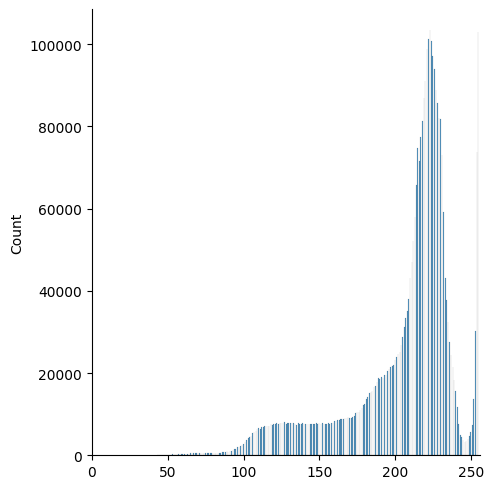

In [93]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.displot(im.flatten())
plt.xlim([0,256])
plt.show()

## 3.4. Transfer Learning avec VGG16 Imagenet

### 3.4.1. Les fonctions

In [4]:
def get_files(path_list):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in path_list:
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    
    del compteur
    del im
    
    return liste_image

In [5]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    
    del shape
    
    return im

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_clean =  pd.read_csv("data_clean_colab.csv")
print(data_clean.shape)

(1050, 22)


### 3.4.2.Séparation des données en  données train et test

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_clean, test_size = 0.3, random_state=42)

In [8]:
train['image'] = train['image'].apply(lambda x: "Images/"+str(x))
test['image'] = test['image'].apply(lambda x: "Images/"+str(x))

In [9]:
from PIL import Image as Image_PIL
train_cnn = get_files(train.copy()['image'].tolist())
test_cnn = get_files(test.copy()['image'].tolist())

C:\Users\i.dialga\Anaconda3\envs\myenv\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [10]:
len(train_cnn)

735

In [11]:
len(test_cnn)

315

In [12]:
redim(train_cnn[0], 128, 128).shape

(128, 128, 3)

In [13]:
redim(train_cnn[0], 128, 128).reshape(1,-1,3).shape

(1, 16384, 3)

In [14]:
train_array_cnn = np.vstack([redim(img, 128, 128).reshape(1,128,128,3) for img in train_cnn])
test_array_cnn = np.vstack([redim(img, 128, 128).reshape(1,128,128,3) for img in test_cnn])

In [15]:
train_array_cnn.shape

(735, 128, 128, 3)

In [16]:
# Encodage des catégories

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
array_cats = ohe.fit_transform(np.array(train['cat_1']).reshape(-1,1))

In [42]:
array_cats_1=array_cats.todense()
array_cats_1.shape

(735, 7)

In [17]:
train_array_cats = ohe.transform(train[['cat_1']]).todense()
test_array_cats = ohe.transform(test[['cat_1']]).todense()

C:\Users\i.dialga\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
C:\Users\i.dialga\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [18]:
ohe.categories_

[array(['Baby Care', 'Beauty and Personal Care', 'Computers',
        'Home Decor & Festive Needs', 'Home Furnishing',
        'Kitchen & Dining', 'Watches'], dtype=object)]

## 3.5. Transfer Learning avec VGG-16 pré-entraîné sur ImageNet et avec modifications de couches

### 3.5.1. Construction Réseau

In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2D, MaxPooling2D

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,128,3,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(ohe.categories_[0].shape[0], activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [21]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
vgg = VGG16()
vgg.layers.pop()
vgg.layers.pop()
vgg_transfer = Sequential()
vgg_transfer.add(vgg)
vgg_transfer.trainable = False


In [45]:
array_cats_1.shape

(735, 7)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 7)                 2

### 3.5.2.Entraînement

In [23]:
train_array_cnn.shape

(735, 128, 128, 3)

In [24]:
model_info = model.fit(train_array_cnn, train_array_cats, epochs=3, batch_size=40, verbose=2)

Epoch 1/3
19/19 - 9s - loss: 0.2438 - 9s/epoch - 483ms/step
Epoch 2/3
19/19 - 5s - loss: 0.2449 - 5s/epoch - 262ms/step
Epoch 3/3
19/19 - 5s - loss: 0.2449 - 5s/epoch - 260ms/step


In [25]:
for couche in model.get_weights():
    print(couche.shape)

(3, 3, 3, 32)
(32,)
(3, 3, 32, 32)
(32,)
(32768, 7)
(7,)


### 3.5.3. Prédiction

In [26]:
predictions_test = model.predict(test_array_cnn)

10/10 [==============================] - 1s 64ms/step


In [29]:
test_array_cats_1 = np.asarray(test_array_cats)
test_array_cats_1.shape

(315, 7)

### 3.5.4. Metrics

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(predictions_test, axis=1).reshape(-1,1), 
               np.argmax(test_array_cats_1, axis=1).reshape(-1,1))

0.14285714285714285

On obtient un accuracy score de 14 %

In [31]:
np.argmax(test_array_cats, axis=1).reshape(1,-1)

matrix([[2, 5, 2, 1, 6, 0, 3, 2, 4, 4, 6, 0, 5, 1, 2, 2, 0, 2, 4, 4, 5,
         2, 0, 2, 6, 1, 3, 5, 1, 5, 5, 2, 2, 6, 3, 4, 6, 3, 3, 2, 4, 1,
         5, 4, 1, 5, 5, 2, 0, 4, 5, 3, 5, 4, 2, 0, 1, 5, 2, 4, 4, 0, 6,
         5, 6, 4, 0, 3, 4, 6, 0, 2, 2, 2, 6, 2, 4, 3, 2, 4, 4, 4, 2, 5,
         2, 6, 4, 3, 3, 3, 4, 4, 5, 3, 6, 2, 0, 6, 3, 0, 4, 6, 3, 4, 2,
         6, 1, 5, 4, 2, 5, 4, 4, 0, 0, 0, 2, 6, 6, 2, 2, 2, 3, 4, 5, 3,
         1, 3, 0, 0, 5, 1, 0, 3, 0, 5, 3, 1, 5, 2, 5, 0, 3, 4, 4, 6, 6,
         1, 3, 1, 6, 1, 6, 3, 2, 4, 6, 1, 3, 6, 6, 6, 0, 2, 3, 6, 6, 2,
         6, 2, 6, 1, 4, 6, 0, 6, 3, 3, 4, 3, 0, 5, 4, 3, 0, 1, 0, 6, 2,
         4, 1, 6, 5, 4, 5, 2, 1, 5, 2, 2, 1, 0, 4, 2, 1, 3, 6, 0, 0, 3,
         6, 3, 2, 2, 4, 1, 0, 4, 3, 3, 4, 0, 1, 4, 2, 3, 4, 0, 2, 1, 2,
         2, 1, 2, 5, 4, 0, 6, 1, 4, 4, 4, 4, 0, 3, 2, 3, 3, 0, 5, 0, 6,
         5, 0, 5, 0, 5, 3, 1, 0, 0, 6, 6, 5, 3, 2, 1, 2, 1, 2, 6, 5, 0,
         4, 3, 4, 0, 3, 5, 2, 6, 0, 6, 0, 5, 6, 1, 4, 3, 4, 0, 5

In [32]:
np.argmax(predictions_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
ohe.categories_[0][0]

'Baby Care'

## 3.6. Transfer Learning avec VGG-16 pré-entraîné sur ImageNet et sans modifications de couches 

In [ ]:
array_cats_1 = np.asarray(array_cats_1)
array_cats_1.shape
labels = np.argmax(array_cats_1, axis=1)

In [42]:
train_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in train_cnn])
test_array_cnn = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in test_cnn])

print('train array shape : ', train_array_cnn.shape)
print('train array cats : ', train_array_cats.shape)

train array shape :  (735, 224, 224, 3)
train array cats :  (735, 7)


### 3.6.1.Chargement du modèle pré-entrainé et prédiction

In [45]:
from keras.applications.vgg16 import VGG16
from keras import Model
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

In [48]:
prediction = model.predict(train_array_cnn)

23/23 [==============================] - 90s 4s/step


In [49]:
prediction.shape

(735, 7, 7, 512)

### 3.6.2. Réduction de dimension PCA

In [60]:
import numpy as np

# Suppose your 4D image array is named `image_array`
# The shape of the 4D array is (num_images, height, width, num_channels)
num_images = im_features.shape[0]
height = im_features.shape[1]
width = im_features.shape[2]
num_channels = im_features.shape[3]

# Reshape the 4D array into a 2D array
# The new shape will be (num_images, height*width*num_channels)
image_2d = np.reshape(im_features, (num_images, height*width*num_channels))
image_2d.shape

(735, 25088)

In [64]:
im_features=image_2d
im_features.shape

(735, 25088)

In [70]:
from sklearn import manifold, decomposition
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.9)
feat_pca= pca.fit_transform(im_features )
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (735, 25088)
Dimensions dataset après réduction PCA :  (735, 431)


### 3.6.3.  Réduction de dimension T-SNE

In [71]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_clean["cat_1"]
print(df_tsne.shape)

(735, 3)


In [74]:
df_tsne.head()

tsne1      tsne2            class
0   0.363138   4.925429  Home Furnishing
1  -4.717870 -12.854926        Baby Care
2  26.458820 -11.264505        Baby Care
3  -2.266900   4.075785  Home Furnishing
4 -19.337400  -5.357696  Home Furnishing

### 3.6.4.  Analyse visuelle : affichage T-SNE selon catégories d'images

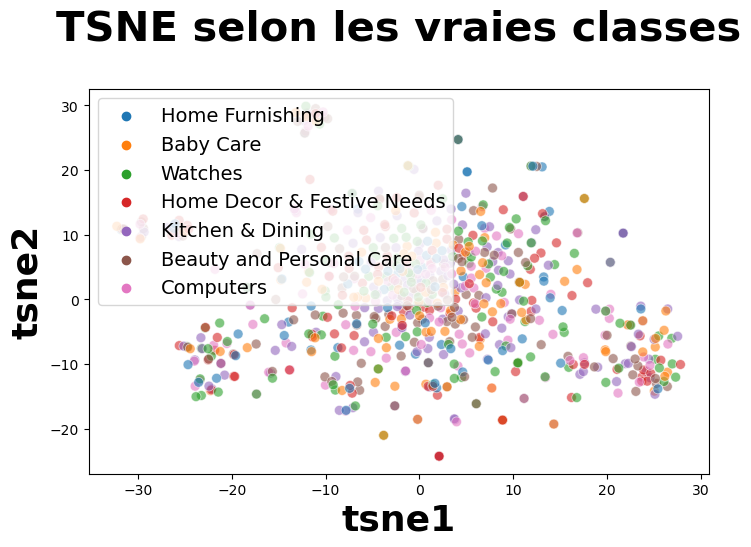

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()

### 3.6.5.Analyse mesures : similarité entre catégories et clusters

### Création de clusters à partir du T-SNE

In [77]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

C:\Users\i.dialga\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\i.dialga\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


(735, 4)


### 3.6.6. Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

In [92]:
array_cats_1 = np.asarray(array_cats_1)
array_cats_1.shape
labels = np.argmax(array_cats_1, axis=1)
labels.shape 

(735,)

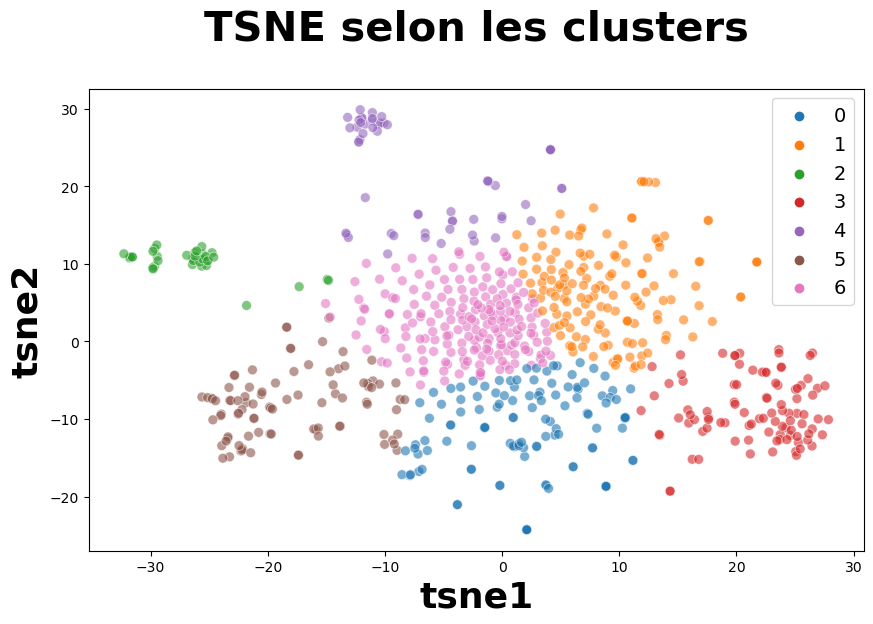

ARI :  0.2998116832597383


In [93]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

#labels = data_clean["cat_1"][:735] 
labels
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [94]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    118
1    146
2     37
3     95
4     58
5     90
6    191
Name: class, dtype: int64

# Modélisation avec

In [ ]:
from keras.applications.inception_v3 import InceptionV3

list_yhat_Inc = []

model = InceptionV3()
    
for image_num in range(len(list_photos)) :
    #if type(image_num) is not None :
        
    if image_num%100 == 0 : print(image_num)
    
    # load an image from file
    image = load_img(path+list_photos[image_num], target_size=(299, 299))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # predict the probability across all output classes
    yhat = model.predict(image)
    list_yhat_Inc.append(yhat)